<a href="https://colab.research.google.com/github/priyanships31/Company_Classification/blob/main/Company_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.pyplot as plt
# from kmeanstf import KMeansTF
from scipy.spatial.distance import cdist
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import sent_tokenize, word_tokenize


In [18]:
data = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 4/Capstone Project/Company Classification/data_company_classification.csv')

In [19]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73974 entries, 0 to 73973
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   website           73974 non-null  object
 1   company_name      73974 non-null  object
 2   homepage_text     73305 non-null  object
 3   h1                46653 non-null  object
 4   h2                53212 non-null  object
 5   h3                44659 non-null  object
 6   nav_link_text     48050 non-null  object
 7   meta_keywords     23672 non-null  object
 8   meta_description  66886 non-null  object
dtypes: object(9)
memory usage: 5.1+ MB


In [20]:
data.shape

(73974, 9)

In [21]:
data.head()

,website,company_name,homepage_text,h1,h2,h3,nav_link_text,meta_keywords,meta_description
0,bipelectric.com,bip dipietro electric inc,Electrici...,NaN,NaN,NaN,NaN,"electricians vero beach, vero beach electrical...","Providing quality, reliable full service resid..."
1,eliasmedical.com,elias medical,site map | en español Elias Medical h...,Offering Bakersfield family medical care from ...,Welcome to ELIAS MEDICAL#sep#Family Medical Pr...,Get To Know Elias Medical#sep#Family Medical P...,NaN,Elias Medical bakersfield ca family doctor med...,For the best value in Bakersfield skin care tr...
2,koopsoverheaddoors.com,koops overhead doors,Home About Us Garage Door Repair & Servi...,NaN,Customer Reviews#sep#Welcome to Koops Overhead...,NaN,NaN,"Koops Overhead Doors, Albany Garage Doors, Tro...","Koops Overhead Doors specializes in the sales,..."
3,midtowneyes.com,midtown eyecare,918-599-0202 Type Size...,NaN,Welcome to our practice!,NaN,NaN,NaN,We would like to welcome you to Midtown Eyecar...
4,reprosecurity.co.uk,repro security ltd,Simply fill out our form below...,NaN,Welcome to REPRO SECURITY Ltd,NaN,NaN,NaN,Repro Security provide a range of tailor made ...


## Missing value treatment

In [22]:
data[['homepage_text', 'nav_link_text','meta_keywords', 'meta_description']].isnull().sum(axis=1).value_counts()

1    44319
2    14671
0    11660
3     2974
4      350
dtype: int64

In [23]:
data['homepage_text'] = data['homepage_text'].dropna()

In [24]:
df = pd.DataFrame(data, columns = ['homepage_text'])

In [25]:
df.dropna()

,homepage_text
0,Electrici...
1,site map | en español Elias Medical h...
2,Home About Us Garage Door Repair & Servi...
3,918-599-0202 Type Size...
4,Simply fill out our form below...
...,...
73969,
73970,Home About Us Our S...
73971,03 9531 5092 M...
73972,...


In [26]:
df['homepage_text'].values

array(['                                     Electricians and electrical contractors serving Vero Beach FL and Indian River County, Florida area for over fifteen years.  Locally owned and operated, Bip DiPietro Electric is dedicated to providing helpful, reliable electrical service to residential, commercial and retail clients alike.  We are fully licensed and insured, and our expert staff of electricians is ready to serve the Vero Beach area any time of the week, day or night.  Bip DiPietro Electric is a full service firm specializing in all areas of Electrical Installation for Commercial and Residential buildings alike. We believe that the job needs to be done and it needs to be done right. All of the employees here at Bip DiPietro Electric strive to give you, our client, exactly what your plans specify and install them the way that they are meant to be installed.   Not only is electricity a necessity these days, but it is also a technology that must be treated with caution and respe

In [27]:
df['homepage_text'].dropna()




0                                             Electrici...
1            site map | en español    Elias Medical   h...
2            Home  About Us  Garage Door Repair & Servi...
3                         918-599-0202        Type Size...
4                        Simply fill out our form below...
                               ...                        
73969                                                     
73970                         Home    About Us    Our S...
73971                                    03 9531 5092 M...
73972                                                  ...
73973                                                  ...
Name: homepage_text, Length: 73305, dtype: object

In [28]:
df.head()

,homepage_text
0,Electrici...
1,site map | en español Elias Medical h...
2,Home About Us Garage Door Repair & Servi...
3,918-599-0202 Type Size...
4,Simply fill out our form below...



## Removing Special Characters





In [29]:
df['homepage_text'].isnull().sum()

669

In [30]:
df['homepage_text'] = df['homepage_text'].fillna(' ')

In [31]:
df['homepage_text'].isnull().sum()

0

In [32]:
def remove_punctuation(news):
  translator = str.maketrans('', '', string.punctuation)
  return news.translate(translator)

In [33]:
df['homepage_text']= df['homepage_text'].apply(remove_punctuation)

In [34]:
df['homepage_text'][2]

'    Home  About Us  Garage Door Repair  Service  DesignADoor  Garage Doors  Garage Door Openers  Accessories  Customer Reviews  Photo Gallery  Contact Us  Free Garage Door Estimate        Home  About Us  Garage Door Repair  Service  DesignADoor  Contact Us  Free Estimate                      117 Edgewood Drive  Averill Park NY 12018  Phone 518 3767382  Garage Door Service Installation and Repairs in Albany Troy  Clifton Park East Greenbush and surrounding Capital District New York areas          Garage Doors  Garage Door Openers  Accessories  Customer Reviews  Photo Gallery  Contact Us      Previous  Next        Posted by jtafur on Oct 6 2011  Welcome to Koops Overhead Doors  Koops Overhead Doors is family owned and operated with over 18 years of experience serving residential and commercial clients in Albany Troy Clifton Park East Greenbush and the surrounding Capital District areas We specialize in the sales service repair and installation of garage doors and garage door openers  Re

In [35]:
import re

In [36]:
import nltk
nltk.download('punkt')
  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [38]:
def remove_punctuation(text):
    lst = [c for c in text if c not in string.punctuation]
    return ''.join(lst)

In [39]:
df['homepage_text'] = df['homepage_text'].apply(remove_punctuation)

In [40]:
df['homepage_text'][2]

'    Home  About Us  Garage Door Repair  Service  DesignADoor  Garage Doors  Garage Door Openers  Accessories  Customer Reviews  Photo Gallery  Contact Us  Free Garage Door Estimate        Home  About Us  Garage Door Repair  Service  DesignADoor  Contact Us  Free Estimate                      117 Edgewood Drive  Averill Park NY 12018  Phone 518 3767382  Garage Door Service Installation and Repairs in Albany Troy  Clifton Park East Greenbush and surrounding Capital District New York areas          Garage Doors  Garage Door Openers  Accessories  Customer Reviews  Photo Gallery  Contact Us      Previous  Next        Posted by jtafur on Oct 6 2011  Welcome to Koops Overhead Doors  Koops Overhead Doors is family owned and operated with over 18 years of experience serving residential and commercial clients in Albany Troy Clifton Park East Greenbush and the surrounding Capital District areas We specialize in the sales service repair and installation of garage doors and garage door openers  Re

## Removing Numbers

In [41]:
import re

In [42]:
df['homepage_text'].isnull().sum()

0

In [43]:

df['homepage_text'] = df['homepage_text'].str.replace('\d+', '')


In [44]:
df['homepage_text'][5]

'      Wood Green Timber Co Ltd  Wood Green  Tel     Potters Bar  Tel      Londons Specialist Timber Merchants st in Quality st For Service      Home  Timber    Sawn  Treated Timber  OversizedSpecialist Timber  Joinery Timber  Mouldings  Hardwood  Decking  Fencing     Sheet Materials    Plywood  MDF  Chipboard  Sterling Board  Hardboard     Building Supplies    Plasterboards  Insulation  PlasterBondingCement  Aggregates  Fire Rated Materials  Doors  Roofing  Tools  Ironmongery     Our Services    Delivery  Cutting  to Customer Service     Sustainability  Contact    Contact Wood Green  Contact Potters Bar                            Price matching    When it comes to pricing a job no matter how big or small our clients will always be looking for the best possible prices they can get          North Londons Timber Specialists    High stock levels  to match your building requirements          FireRated materials    Fire resistant materials to the highest standards          Over yrs of Tradi

## Removing Stopwords

In [45]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
stop_words = stopwords.words('english')

In [47]:
def stopwords(text):
  text = [word.lower() for word in text.split() if word.lower() not in stop_words]
  return " ".join(text)

In [48]:
df['homepage_text'] = df['homepage_text'].apply(stopwords)

In [49]:
df['homepage_text'][3]

'type size home practice services patient forms eye care articles lasik glaucoma diagnosis cataracts diabetic eye exams location welcome practice excited provide professional eye care services comfortable friendly environment please contact us schedule appointment today click request appointment access forms visit office services provide would like welcome midtown eyecare professionals practice provide patient quality vision solutions exceptional customer service staff experienced areas vision care maintaining healthy eyes requires regular vision eye exams look forward serving beforehand thank taking time browse website encourage learn dr kyle craig office staff practice know many choices appreciate interest office contact us peoria avenue tulsa ok phone office hours mon pm tue pm wed pm thu pm fri pm notice privacy practices website eyefinity'


## Lemmatization

In [50]:
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import WhitespaceTokenizer as w_tokenizer
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [51]:
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from collections import defaultdict
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

In [52]:
def lemmatize_text(text):
  
  tokens = word_tokenize(text)
  lemmatizer = WordNetLemmatizer()
  l = []
  for token, tag in pos_tag(tokens):
    lemma = lemmatizer.lemmatize(token, tag_map[tag[0]])
    l.append(lemma)
    
  return " ".join(l)

In [54]:
df['homepage_text'] = df['homepage_text'].apply(lemmatize_text)

In [55]:
df['homepage_text'][20]

'javascript seem disabled browser best experience site sure turn javascript browser feedback contact u help center tour event calendar skip content toggle nav search cart branch branch middle street middletown ct change branch login register top result deliver pick call price discontinue product find match criterion \u200b search account shop category quick order shop list service location u u line card contact u career chat customer support branch login account account shop category list help center customer service branch number feedback view location click choose technology increase roi hit easy button automate inventory management upload logo order account change order list catalog contact upload logo × please upload jpg jpeg png gif format image resolution pixel max mb size browse close save change top category wire device see combination device plug connector receptacle switch wall switch plate power strip multioutlet converter conduit fitting see cable tray accessory conduit fit

In [56]:
# df['homepage_text'].shape()

In [57]:
def remove_urls_punctuations(text):
  text = re.sub(r"(?:\@|http?\://)\S+", "", text)
  text = re.sub(r"(?:\@|https?\://)\S+", "", text)
  text = re.sub(r"[^\w\s]", "", text)
  return text

In [58]:
df['homepage_text'] = df['homepage_text'].apply(remove_urls_punctuations)

In [59]:
df['homepage_text'][20]

'javascript seem disabled browser best experience site sure turn javascript browser feedback contact u help center tour event calendar skip content toggle nav search cart branch branch middle street middletown ct change branch login register top result deliver pick call price discontinue product find match criterion  search account shop category quick order shop list service location u u line card contact u career chat customer support branch login account account shop category list help center customer service branch number feedback view location click choose technology increase roi hit easy button automate inventory management upload logo order account change order list catalog contact upload logo  please upload jpg jpeg png gif format image resolution pixel max mb size browse close save change top category wire device see combination device plug connector receptacle switch wall switch plate power strip multioutlet converter conduit fitting see cable tray accessory conduit fitting ha

## Vectorizing our data

In [60]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer(max_df=0.9, min_df=0.05)

# fit the vectorizer using the text data
X = tfid_vectorizer.fit_transform(df['homepage_text'][0:30000])


In [61]:
# data.shape

In [62]:
X.shape

(30000, 819)

In [63]:
array = X.toarray()

In [64]:
from sklearn.manifold import TSNE


data_new = TSNE(perplexity=30).fit_transform(array) 


In [65]:
type(data_new)

numpy.ndarray

In [66]:
data_new.shape

(30000, 2)

In [67]:
df = pd.DataFrame(array)
df.shape

(30000, 819)

In [68]:
# pip install tensorflow-gpu


In [69]:
# pip install kmeanstf


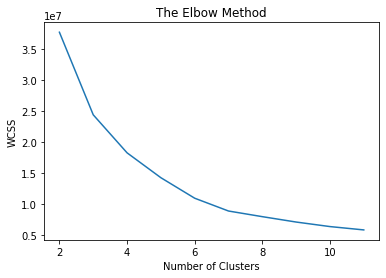

In [70]:

wcss=[]
for i in range(2,12):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(data_new)
    wcss.append(kmeans.inertia_)

plt.plot(range(2,12),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [73]:

range_n_clusters = [2,3,4,5,6,7,8,10]
# data_new = data_new.to_numpy()
X = np.array(data_new)
# data_new = data_new.iloc[:,:-1].values
type(data_new)

numpy.ndarray

In [77]:
from sklearn.metrics import silhouette_score, silhouette_samples

For n_clusters = 2 The average silhouette_score is : 0.32708502
For n_clusters = 3 The average silhouette_score is : 0.35209087
For n_clusters = 4 The average silhouette_score is : 0.3575621
For n_clusters = 5 The average silhouette_score is : 0.38357067
For n_clusters = 6 The average silhouette_score is : 0.40779147
For n_clusters = 7 The average silhouette_score is : 0.42162058
For n_clusters = 8 The average silhouette_score is : 0.40957916
For n_clusters = 9 The average silhouette_score is : 0.40585026
For n_clusters = 10 The average silhouette_score is : 0.40079337
For n_clusters = 11 The average silhouette_score is : 0.4052646


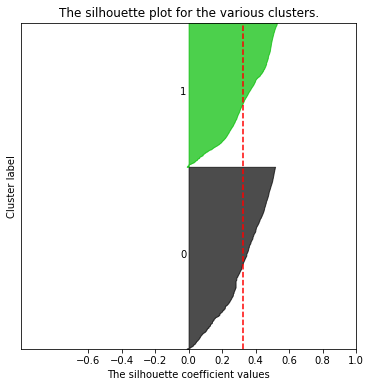

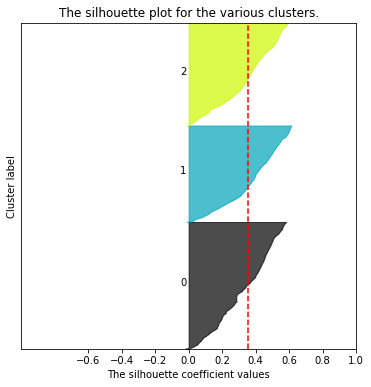

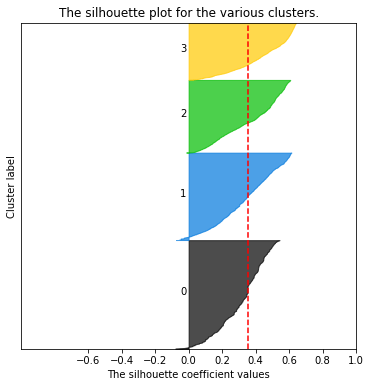

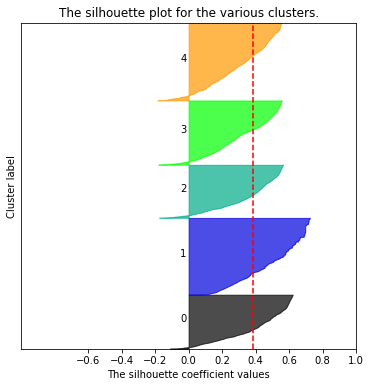

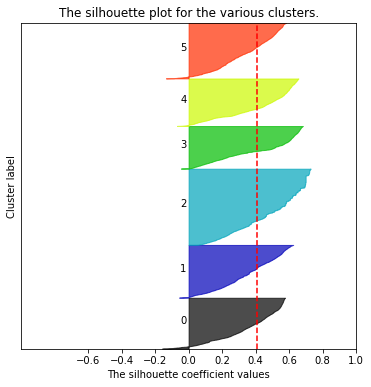

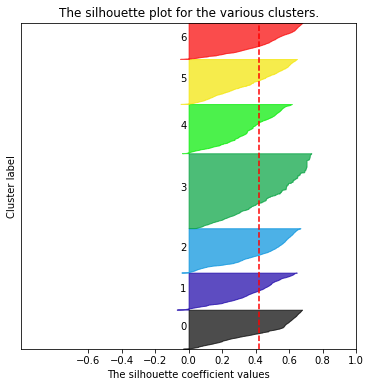

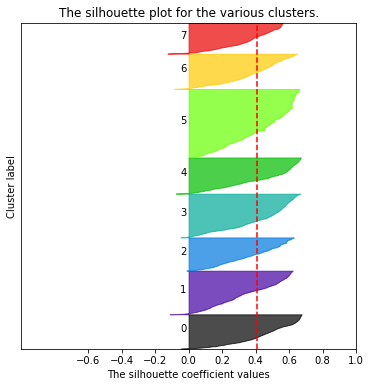

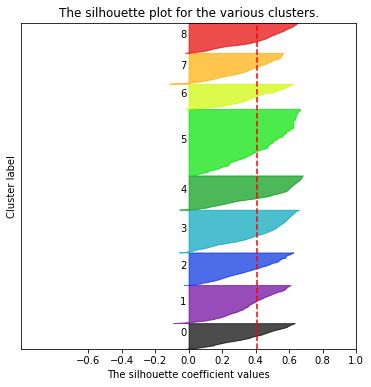

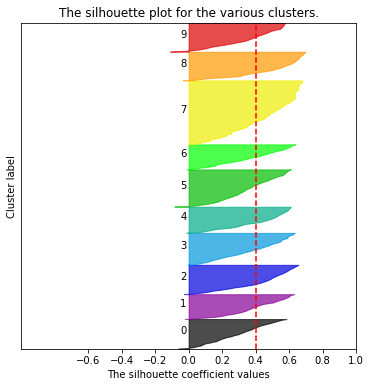

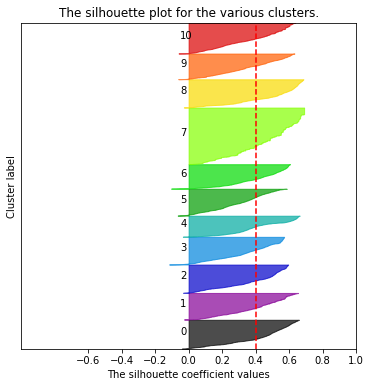

In [78]:
range_n_clusters = np.arange(2,12)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax) = plt.subplots(1)
    fig.set_size_inches(6, 6)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and
    # seed of 10 for reproducibility.
    clusterer = KMeans(init = "k-means++" , n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.6,-0.4,-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

In [79]:
!apt install wordcloud

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package wordcloud


In [80]:
from wordcloud import WordCloud

In [82]:
tfid_vectorizer.get_feature_names()

['ability',
 'able',
 'accept',
 'access',
 'accessibility',
 'account',
 'achieve',
 'across',
 'act',
 'action',
 'activity',
 'add',
 'addition',
 'additional',
 'address',
 'advance',
 'advantage',
 'advice',
 'advisor',
 'affordable',
 'age',
 'agency',
 'agent',
 'air',
 'allow',
 'along',
 'also',
 'always',
 'american',
 'amount',
 'analysis',
 'animal',
 'annual',
 'another',
 'answer',
 'anyone',
 'application',
 'apply',
 'appointment',
 'approach',
 'area',
 'around',
 'article',
 'ask',
 'aspect',
 'assessment',
 'asset',
 'assist',
 'assistance',
 'associate',
 'association',
 'attention',
 'attorney',
 'auto',
 'available',
 'ave',
 'avenue',
 'award',
 'away',
 'back',
 'bank',
 'base',
 'become',
 'begin',
 'believe',
 'benefit',
 'best',
 'beyond',
 'big',
 'bill',
 'blog',
 'board',
 'book',
 'box',
 'brand',
 'bring',
 'broker',
 'budget',
 'build',
 'building',
 'business',
 'buy',
 'ca',
 'calculator',
 'california',
 'call',
 'can',
 'capability',
 'capital',
 'c

In [83]:
tfid_vectorizer.vocabulary_

{'ability': 0,
 'able': 1,
 'accept': 2,
 'access': 3,
 'accessibility': 4,
 'account': 5,
 'achieve': 6,
 'across': 7,
 'act': 8,
 'action': 9,
 'activity': 10,
 'add': 11,
 'addition': 12,
 'additional': 13,
 'address': 14,
 'advance': 15,
 'advantage': 16,
 'advice': 17,
 'advisor': 18,
 'affordable': 19,
 'age': 20,
 'agency': 21,
 'agent': 22,
 'air': 23,
 'allow': 24,
 'along': 25,
 'also': 26,
 'always': 27,
 'american': 28,
 'amount': 29,
 'analysis': 30,
 'animal': 31,
 'annual': 32,
 'another': 33,
 'answer': 34,
 'anyone': 35,
 'application': 36,
 'apply': 37,
 'appointment': 38,
 'approach': 39,
 'area': 40,
 'around': 41,
 'article': 42,
 'ask': 43,
 'aspect': 44,
 'assessment': 45,
 'asset': 46,
 'assist': 47,
 'assistance': 48,
 'associate': 49,
 'association': 50,
 'attention': 51,
 'attorney': 52,
 'auto': 53,
 'available': 54,
 'ave': 55,
 'avenue': 56,
 'award': 57,
 'away': 58,
 'back': 59,
 'bank': 60,
 'base': 61,
 'become': 62,
 'begin': 63,
 'believe': 64,
 'ben

In [88]:
df_ = pd.DataFrame(array, columns=tfid_vectorizer.get_feature_names())

In [90]:
df_.head()

,ability,able,accept,access,accessibility,account,achieve,across,act,action,activity,add,addition,additional,address,advance,advantage,advice,advisor,affordable,age,agency,agent,air,allow,along,also,always,american,amount,analysis,animal,annual,another,answer,anyone,application,apply,appointment,approach,...,user,value,variety,various,ve,vehicle,veterinary,via,video,view,vision,visit,wait,want,watch,water,way,we,wealth,web,website,week,welcome,well,west,whether,whole,wide,win,within,without,work,worker,world,would,write,year,york,you,youre
0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.056172,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.066916,0.0,0.000000,0.0,0.0,0.120987,0.000000,0.0,0.16005,0.000000,0.088375,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.066614,0.0,0.044752,0.000000,0.000000,0.0
1,0.0,0.04673,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034507,0.0,0.113462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090018,0.0,...,0.0,0.0,0.04918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.037381,0.000000,0.0,0.043430,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
2,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011370,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.052332,0.0,0.0,0.000000,0.056032,0.0,0.00000,0.000000,0.000000,0.049267,0.084709,0.0,0.014310,0.0,0.0,0.0,0.0,0.0,0.06762,0.0,0.0,0.000000,0.0,0.045293,0.019667,0.015652,0.0
3,0.0,0.00000,0.0,0.081646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.174090,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.29921,0.079501,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.130771,0.000000,0.144587,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.079142,0.0,0.000000,0.000000,0.000000,0.0
4,0.0,0.00000,0.0,0.245030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040056,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.039246,0.000000,0.086784,0.037304,0.0,0.050414,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0


In [91]:
data = df_.T #transposing

In [92]:
df_.T.sum(axis=1)

ability          100.799376
able             158.856938
accept           125.114877
access           296.375967
accessibility     94.801751
                    ...    
write            103.496516
year             586.291678
york             153.133924
you              177.296699
youre            101.275066
Length: 819, dtype: float64

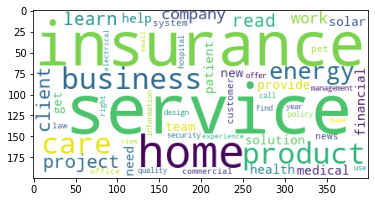

In [93]:
wordcloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(df_.T.sum(axis=1))
plt.imshow(wordcloud)